## Clone Repository

In [3]:
!git clone https://github.com/clovaai/deep-text-recognition-benchmark.git

Cloning into 'deep-text-recognition-benchmark'...
remote: Enumerating objects: 499, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 499 (delta 0), reused 1 (delta 0), pack-reused 495
Receiving objects: 100% (499/499), 3.07 MiB | 6.94 MiB/s, done.
Resolving deltas: 100% (302/302), done.


## Download The Dataset

In [ ]:
# Train Dataset
!gdown 1ubkg7E2vGEOqS4K_quwf9Vl-i8IVpklM

Downloading...
From (original): https://drive.google.com/uc?id=1ubkg7E2vGEOqS4K_quwf9Vl-i8IVpklM
From (redirected): https://drive.google.com/uc?id=1ubkg7E2vGEOqS4K_quwf9Vl-i8IVpklM&confirm=t&uuid=a45a81da-4459-4ca6-b501-d1c798aff816
To: /content/plate_img-train.zip
100% 196M/196M [00:07<00:00, 26.6MB/s]


In [ ]:
# Validation Dataset
!gdown 1AL5Zsg2hDqcwF8ZmR0MJTbjgXIoE5W-I

Downloading...
From (original): https://drive.google.com/uc?id=1AL5Zsg2hDqcwF8ZmR0MJTbjgXIoE5W-I
From (redirected): https://drive.google.com/uc?id=1AL5Zsg2hDqcwF8ZmR0MJTbjgXIoE5W-I&confirm=t&uuid=35b315c0-0ccd-4bba-b227-8a14fde3bc2f
To: /content/plate_img-validation.zip
100% 27.2M/27.2M [00:00<00:00, 29.7MB/s]


In [ ]:
# Test Dataset
!gdown 1lLh_kxrHy1teUB2NguHVuOZwA5rjL5kx

Downloading...
From (original): https://drive.google.com/uc?id=1lLh_kxrHy1teUB2NguHVuOZwA5rjL5kx
From (redirected): https://drive.google.com/uc?id=1lLh_kxrHy1teUB2NguHVuOZwA5rjL5kx&confirm=t&uuid=7cbfff4f-a819-4255-85ea-80a9c2c3f449
To: /content/plate_img-test.zip
100% 56.4M/56.4M [00:03<00:00, 16.4MB/s]


In [ ]:
!unzip -qq ./plate_img-train.zip

In [ ]:
!unzip -qq ./plate_img-test.zip

In [ ]:
!unzip -qq ./plate_img-validation.zip

## Prepare The Dataset

In [ ]:
import os
from lxml import etree as et
from lxml.etree import _Element
from tqdm import tqdm

In [ ]:
words_dict: dict[str, str] = {
    'A': 'الف',
    'B': 'ب',
    'P': 'پ',
    'T': 'ت',
    'Y': 'ث',
    'Z': 'ز',
    'X': 'ش',
    'E': 'ع',
    'F': 'ف',
    'K': 'ک',
    'G': 'گ',
    'D': 'D',
    'S': 'S',
    'J': 'ج',
    'W': 'د',
    'C': 'س',
    'U': 'ص',
    'R': 'ط',
    'Q': 'ق',
    'L': 'ل',
    'M': 'م',
    'N': 'ن',
    'V': 'و',
    'H': 'ه',
    'I': 'ی',
    '0': '0',
    '1': '1',
    '2': '2',
    '3': '3',
    '4': '4',
    '5': '5',
    '6': '6',
    '7': '7',
    '8': '8',
    '9': '9',
    '@': 'ویلچر',
}

In [ ]:
def prepare_dataset(images_dataset_path: str, dataset_type: str) -> None:
    gt_file = open(f'gt_{dataset_type}.txt', 'w', encoding='utf-8')
    parser = et.XMLParser(encoding='utf-8')

    root: _Element

    for file in tqdm(os.listdir(images_dataset_path)):
        # if file.endswith('.jpg'):
        #     ...
        if file.endswith('.xml'):
            path = os.path.join(images_dataset_path, file)
            xml_name = file.split('.')[0]

            tree = et.parse(path, parser)
            root = tree.getroot()

            gt_file.write(os.path.join(dataset_type, f'{xml_name}.jpg'))
            gt_file.write('\t')

            for persian_word in root.iter('name'):
                persian_word = persian_word.text.strip() if persian_word.text else ''
                latin_word = [l_word for l_word, p_word in words_dict.items() if p_word == persian_word]

                if len(latin_word):
                    gt_file.write(latin_word[0])
                else:
                    gt_file.write('')
            gt_file.write('\n')

    gt_file.close()

In [ ]:
prepare_dataset('/content/train', 'train')

100%|██████████| 38762/38762 [00:01<00:00, 21275.81it/s]


In [ ]:
prepare_dataset('/content/validation', 'validation')

100%|██████████| 5610/5610 [00:00<00:00, 21103.80it/s]


In [ ]:
prepare_dataset('/content/test', 'test')

100%|██████████| 11118/11118 [00:00<00:00, 11616.85it/s]


In [ ]:
!pip -q install lmdb fire

In [ ]:
!python3 /content/deep-text-recognition-benchmark/create_lmdb_dataset.py \
--inputPath /content/ --gtFile /content/gt_train.txt --outputPath /content/train_dataset

Written 1000 / 19381
Written 2000 / 19381
Written 3000 / 19381
Written 4000 / 19381
Written 5000 / 19381
Written 6000 / 19381
Written 7000 / 19381
Written 8000 / 19381
Written 9000 / 19381
Written 10000 / 19381
Written 11000 / 19381
Written 12000 / 19381
Written 13000 / 19381
Written 14000 / 19381
Written 15000 / 19381
Written 16000 / 19381
Written 17000 / 19381
Written 18000 / 19381
Written 19000 / 19381
Created dataset with 19381 samples


In [ ]:
!python3 /content/deep-text-recognition-benchmark/create_lmdb_dataset.py \
--inputPath /content/ --gtFile /content/gt_validation.txt \
--outputPath /content/validation_dataset

Written 1000 / 2805
Written 2000 / 2805
Created dataset with 2805 samples


In [ ]:
!python3 /content/deep-text-recognition-benchmark/create_lmdb_dataset.py \
--inputPath /content/ --gtFile /content/gt_test.txt --outputPath /content/test_dataset

Written 1000 / 5559
Written 2000 / 5559
Written 3000 / 5559
Written 4000 / 5559
Written 5000 / 5559
Created dataset with 5559 samples


## Training

In [ ]:
!python3 /content/deep-text-recognition-benchmark/train.py \
--train_data /content/train_dataset --valid_data /content/validation_dataset \
--select_data / --batch_ratio 1 --batch_max_length 8 --valInterval 200 \
--num_iter 9000 --Transformation TPS --FeatureExtraction ResNet \
--SequenceModeling BiLSTM --Prediction Attn

Filtering the images containing characters which are not in opt.character
Filtering the images whose label is longer than opt.batch_max_length
--------------------------------------------------------------------------------
dataset_root: /content/train_dataset
opt.select_data: ['/']
opt.batch_ratio: ['1']
--------------------------------------------------------------------------------
dataset_root:    /content/train_dataset	 dataset: /
sub-directory:	/.	 num samples: 19311
num total samples of /: 19311 x 1.0 (total_data_usage_ratio) = 19311
num samples of / per batch: 192 x 1.0 (batch_ratio) = 192
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avo

In [ ]:
!cp -r /content/saved_models /content/drive/MyDrive/datasets/Persian_License_Plate

## Inference

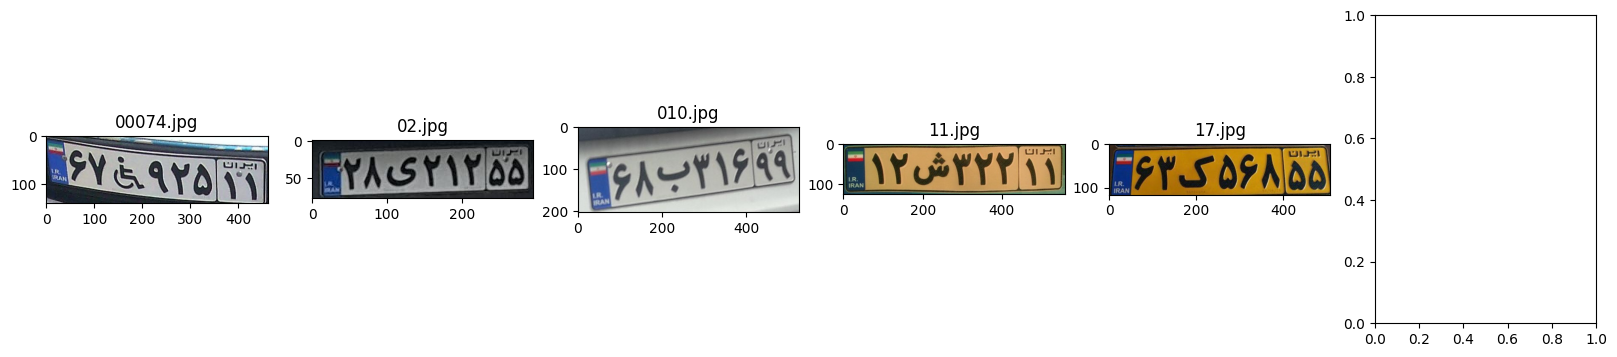

In [17]:
import os
import cv2 as cv
import matplotlib.pyplot as plt

test_images_path = '/content/test_images'
images_names = os.listdir(test_images_path)
# print(images_names)

fig, axes = plt.subplots(1, len(images_names), figsize=(20, 4))

for idx, ax in enumerate(axes):
    img = cv.imread(os.path.join(test_images_path, images_names[idx]))
    ax.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    ax.set_title(images_names[idx])

plt.show()

In [15]:
!python3 /content/deep-text-recognition-benchmark/demo.py \
--Transformation TPS --FeatureExtraction ResNet --SequenceModeling BiLSTM --Prediction Attn \
--image_folder /content/test_images \
--saved_model /content/drive/MyDrive/datasets/Persian_License_Plate/saved_models/TPS-ResNet-BiLSTM-Attn-Seed1111/best_accuracy.pth

model input parameters 32 100 20 1 512 256 38 25 TPS ResNet BiLSTM Attn
loading pretrained model from /content/drive/MyDrive/datasets/Persian_License_Plate/saved_models/TPS-ResNet-BiLSTM-Attn-Seed1111/best_accuracy.pth
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
--------------------------------------------------------------------------------
image_path               	predicted_labels         	confidence score
--------------------------------------------------------------------------------
/content/test_images/02.jpg	28i21255                 	0.9998
/content/test_